In [16]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import ParameterGrid
from itertools import combinations

In [17]:
files = [f for f in os.listdir('ERF_heatmap_complete/') if 'results' in f]

In [43]:
all_results = []

for file in files:
    
    with open('ERF_heatmap_complete/'+file, 'rb') as f:
        result = pickle.load(f)
        
    for r in result:
        
        all_results.append({'m':r['m'], 'a1':r['ap'], 'q1':r['qd'], 'ttr':r['ttr'], 
                           'SM_control':r['Y_control'][1]+r['Y_control'][2], 
                           'SM_treatment':r['Y_treatment'][1]+r['Y_treatment'][2], 
                           'DM_control':r['Y_control'][-1],
                           'DM_treatment':r['Y_treatment'][-1]})
        
df_all_results = pd.DataFrame(all_results)

In [65]:
df_all_results

,m,a1,q1,ttr,SM_control,SM_treatment,DM_control,DM_treatment
0,29900.000000,7.700000,0.999999,0.000000,1.283771e+06,1.283771e+06,44.341094,44.341094
1,29900.000000,7.700000,0.999999,0.736842,1.283771e+06,1.283771e+06,44.341094,44.341094
2,29900.000000,7.700000,0.999999,1.473684,1.283771e+06,1.283771e+06,44.341094,44.341094
3,29900.000000,7.700000,0.999999,2.210526,1.283771e+06,1.283771e+06,44.341094,44.341094
4,29900.000000,7.700000,0.999999,2.947368,1.283771e+06,1.283771e+06,44.341094,44.341094
...,...,...,...,...,...,...,...,...
388957,8973.684211,7.873684,0.999997,11.789474,2.651490e+06,2.587912e+06,90.804457,95.199626
388958,8973.684211,7.873684,0.999997,12.526316,2.651490e+06,2.596143e+06,90.804457,93.951280
388959,8973.684211,7.873684,0.999997,13.263158,2.651490e+06,2.603794e+06,90.804457,93.013487
388960,8973.684211,7.873684,0.999997,14.000000,2.651490e+06,2.610730e+06,90.804457,92.315503


In [64]:
{'m':r['m'], 'a1':r['ap'], 'q1':r['qd'], 'ttr':r['ttr'], 
                           'SM_control':r['Y_control'][1]+r['Y_control'][2], 
                           'SM_treatment':r['Y_treatment'][1]+r['Y_treatment'][2], 
                           'DM_control':r['Y_control'][-1],
                           'DM_treatment':r['Y_treatment'][-1]}

{'m': 8973.684210526317,
 'a1': 7.873684210526316,
 'q1': 0.999997,
 'ttr': 5,
 'SM_control': 2651489.61936226,
 'SM_treatment': 2668707.625094266,
 'DM_control': 90.80445699388085,
 'DM_treatment': 147.94475240960543}

In [44]:
with open('ERF_heatmap_complete/new_paramgrid_epistasis.txt', 'rb') as f:
    param_grid = pickle.load(f)
df_paramgrid = pd.DataFrame(param_grid)

In [45]:
along_m = sorted(list(set(df_all_results['m'])))
along_ap = sorted(list(set(df_all_results['a1'])))
along_ttr = sorted(list(set(df_all_results['ttr'])))
along_qd = sorted(list(set(df_all_results['q1'])))
along_m.remove(20000)
along_ap.remove(7.8)
along_ttr.remove(5)
along_qd.remove(1-3e-6)
all_along_params = [('m',along_m), ('a1',along_ap), ('ttr',along_ttr), ('q1',along_qd)]
all_names_params = ['m', 'a1', 'ttr', 'q1']

In [46]:
all_colormap_params = list(combinations(all_along_params, 2))
all_colormap_names = list(combinations(all_names_params,2))

In [67]:
dict_other_vals = {'m':20000, 'a1': 7.8, 'q1':1-3e-6, 'ttr':5}
r1 = 1

In [68]:
df_axes

,m,a1,q1,ttr,SM_control,SM_treatment,DM_control,DM_treatment
169804,20000.0,7.8,0.999999,14.0,1.678297e+06,1.678297e+06,56.027072,56.027072
364285,20000.0,7.8,0.999999,14.0,1.678297e+06,1.678297e+06,56.027072,56.027072


In [88]:
all_matrices_for_cmap = []

for comb in all_colormap_params:
    params_axes = (comb[0][0], comb[1][0])
    print(params_axes)
    other_params = set(all_names_params)-set(params_axes)

    colormap_params = np.zeros((len(comb[0][1]), len(comb[1][1])))
    
    for xind in range(len(comb[0][1])):
        for yind in range(len(comb[0][1])):
            df_axes = df_all_results.copy()
            for p in other_params:
                df_axes = df_axes[df_axes[p] == dict_other_vals[p]]
            df_axes = df_axes[(df_axes[params_axes[0]] == comb[0][1][xind])&(df_axes[params_axes[1]] == comb[1][1][yind])]
            
            #num = list(df_axes['SM_treatment'])[1]+r1*list(df_axes['DM_treatment'])[1]
            #den = list(df_axes['SM_control'])[1]+r1*list(df_axes['DM_control'])[1]
            
            num = r1*list(df_axes['DM_treatment'])[1]
            den = r1*list(df_axes['DM_control'])[1]
            colormap_params[xind, yind] = float(num)/float(den)
            
    all_matrices_for_cmap.append(colormap_params)

('m', 'a1')
('m', 'ttr')
('m', 'q1')
('a1', 'ttr')
('a1', 'q1')
('ttr', 'q1')


In [89]:
indices_colormaps = []
for i in range(3):
    for j in range(2):
        indices_colormaps.append((i,j))
indices_colormaps = dict(zip(range(6), indices_colormaps))

In [90]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

def calculate_ticks_log(ticklabels, truerange, tickrange):
    tick_labels = np.log(ticklabels)
    true_range = np.log(truerange)
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

In [91]:
param_ticks = {'m':[1500,5000,10000,15000,20000,25000,29900],
               'a1':[7.7,8.0,8.3,8.6,8.8],
               'q1':[1-1e-6,1-3e-6,1-5e-6,1-7.5e-6,1-1e-5], 
               'ttr':[0,3,7,10,14]}
param_ranges = {'m':[1500,29900],
                'a1':[7.7,8.8],
                'q1':[1e-6,1e-5],
                'ttr':[0,14]}

In [92]:
all_xticks, all_yticks = [],[]
all_xticklabels, all_yticklabels = [],[]

for i in range(6):
    
    x_param, y_param = all_colormap_names[i]

    if y_param == 'q1':
        ticks_y = calculate_ticks_log(1-np.array(param_ticks[y_param]), param_ranges[y_param], [0,19])
    else:
        ticks_y = calculate_ticks(np.array(param_ticks[y_param]), param_ranges[y_param], [0,19])
        
    if y_param == 'q1':
        labels_y = list(["{:.1e}".format(1-x) for x in np.array(param_ticks[y_param])])
    elif y_param == 'a1':
        labels_y = [np.round(x,2) for x in param_ticks[y_param]]
    else:
        labels_y = [int(np.round(x)) for x in param_ticks[y_param]]
        
    if x_param == 'q1': 
        ticks_x = 19-np.array(calculate_ticks_log(1-np.array(param_ticks[x_param]), param_ranges[x_param], [0,19])[::-1])
    else:
        ticks_x = 19-np.array(calculate_ticks(np.array(param_ticks[x_param]), param_ranges[x_param], [0,19])[::-1])
            

    if x_param == 'q1':
        labels_x = list(["{:.1e}".format(1-x) for x in np.array(param_ticks[x_param])])
    elif x_param == 'a1':
        labels_x = [np.round(x,2) for x in param_ticks[x_param]]
    else:
        labels_x = [int(np.round(x)) for x in param_ticks[x_param]]
    
    
    all_xticks.append(ticks_x)
    all_yticks.append(ticks_y)
    all_xticklabels.append(labels_x)
    all_yticklabels.append(labels_y)

In [93]:
params_description = {'m':'Number of lethal positions $m$',
                      'n':'Number of gain-of-function positions $n$',
                      'a1': 'Clearance rate in clearance phase $a_1$ (per day)',
                      'q1': 'Viral mutation rate under treatment $u_1$ (per bp)',
                      'ttr': 'Time of start of treatment'}

In [94]:
all_matrices_for_cmap

[array([[3.66315324, 3.82362807, 3.65747353, 3.41426459, 3.17020731,
         2.94816003, 2.7530574 , 2.58375175, 2.43725858, 2.31030968,
         2.19989518, 2.10341629, 2.01869107, 1.94390933, 1.87757545,
         1.81845349, 1.7655196 , 1.7179224 , 1.67495073, 1.63600772],
        [2.43976201, 2.82346119, 2.88245494, 2.81217928, 2.69537355,
         2.56711375, 2.44208832, 2.32603264, 2.22069582, 2.1260719 ,
         2.0414257 , 1.96576873, 1.89807724, 1.83738723, 1.78283056,
         1.73364326, 1.68916105, 1.64880991, 1.61209506, 1.57859016],
        [1.81925173, 2.22125694, 2.36520819, 2.38183921, 2.33896988,
         2.27042125, 2.19295692, 2.11480249, 2.03986117, 1.96982693,
         1.90526386, 1.84616712, 1.79225798, 1.74313964, 1.69837907,
         1.65754885, 1.62024741, 1.58610758, 1.55479886, 1.52602648],
        [1.45654527, 1.82831736, 2.00166459, 2.06294092, 2.06423186,
         2.03462811, 1.9901    , 1.93937829, 1.88720331, 1.8360992 ,
         1.78734954, 1.74154103

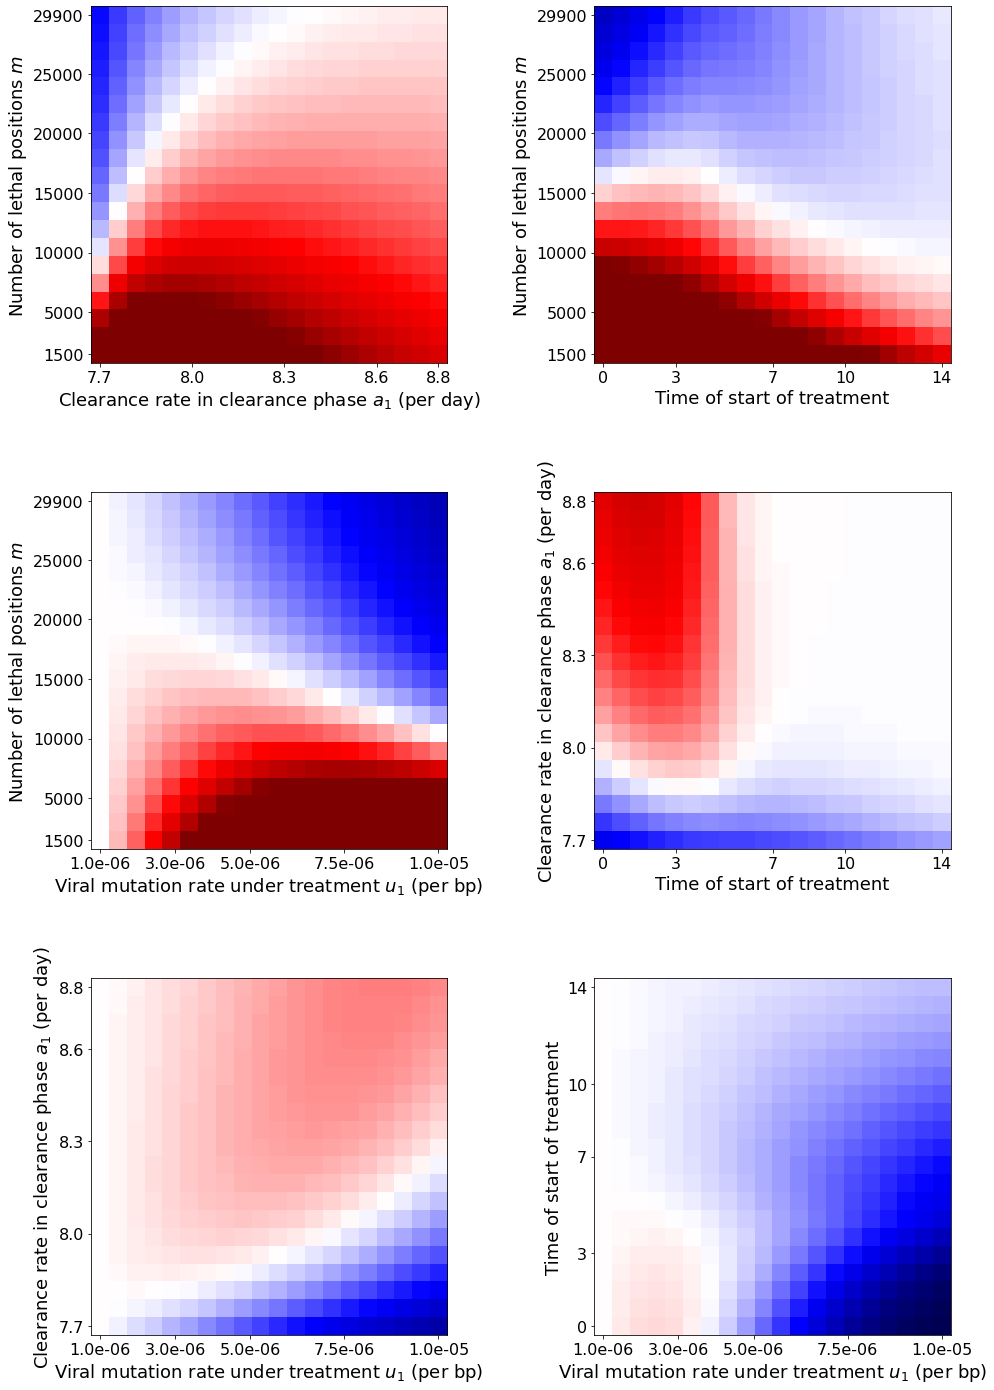

In [95]:
fig, ax = plt.subplots(3,2,figsize=(14,20))

for i in range(6):
    im = ax[indices_colormaps[i]].imshow(all_matrices_for_cmap[i][::-1], cmap = 'seismic', vmin = 0., vmax = 2)
    if all_colormap_params[i][1][0] in ['q1']:
        im = ax[indices_colormaps[i]].imshow(np.flip(all_matrices_for_cmap[i][::-1],1), cmap = 'seismic', vmin = 0., vmax = 2)

    ax[indices_colormaps[i]].set_xticks(all_yticks[i])
    ax[indices_colormaps[i]].set_xticklabels(all_yticklabels[i], fontsize = 16)
    
    ax[indices_colormaps[i]].set_yticks(all_xticks[i])
    ax[indices_colormaps[i]].set_yticklabels(all_xticklabels[i][::-1], fontsize = 16)    
    
    
    ax[indices_colormaps[i]].set_ylabel(params_description[all_colormap_params[i][0][0]], fontsize = 18)
    ax[indices_colormaps[i]].set_xlabel(params_description[all_colormap_params[i][1][0]], fontsize = 18)
    
    
plt.tight_layout(pad=3.0)
plt.savefig('colormaps_fig5_epistasis_ERF_onlyDM_JULY19.jpg', dpi = 600)

In [18]:
all_matrices_for_cmap

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1